# Numpy for Finance 01 - Numpy 기본

<img width="320" src="http://i.imgur.com/1Z9bz5V.jpg">

### 2018-2019 [FinanceData.KR](http://fb.com/financedata)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams["axes.grid"] = True

# NumPy
* **Num**erical **Py**thon, "넘피"라고 읽는다.
* https://numpy.org (홈페이지)
* https://docs.scipy.org/doc/numpy (공식 레퍼런스)
* 많은 scientific library 들이 NumPy 기반
 * Pandas, Scipy, matplotlib, scikit-learn, statsmodels
 * TensorFlow: NumPy ndarray 확장 + 자동미분 + GPU 지원

# NumPy 특징
수치 데이터를 다루는데 효율적이고 높은 성능을 제공 한다.
* 대규모 데이터를 빠르게
* 스칼라 연산과 비슷하게 연산을 수행
* Linear algebra, Fourier transform, Random 기능들
* 배열을 요소별로 조작하지 않고도 원소별 연산이 가능 - 브로드캐스팅(broadcasting)

# Note:
* 향후 금융 데이터를 다룰 때, NumPy보다 pandas를 훨씬 더 많이 사용
* NumPy에 대한 이해가 있으면 pandas를 이해하는데 더 도움<br> (pandas가 NumPy기반으로 되어 있기 때문)
* 파이썬 머신러닝을 하게 된다면 NumPy에 대한 매우 중요한 역할 
* 다차원 배열 생성이 가능하지만, 주로 2차원 사용

# ndarray
* NumPy의 핵심
* ndarray: n-dimensional array object, 다차원 배열 객체
* 모든 요소가 동일한 datatype (기본은 float64)
* 다차원 데이터도 연속 할당: 높은 성능의 비밀 (파이썬 리스트는 비연속)

# 설치

#### 설치
```bash
$ pip install numpy 
```

#### 설치 확인
```python
import numpy as np
np.__version__
```

# NumPy 성능
* NumPy와 Pandas를 사용하면, 반복문을 거의 사용하지 않고도 데이터 처리
* 코드가 줄어들 뿐만 아니라, 성능도 최대 수 백배까지 빠르다

In [2]:
import numpy as np

ls = range(1000)
%timeit [i**2 for i in ls]

a = np.arange(1000)
%timeit a**2

# 200배

1000 loops, best of 3: 287 µs per loop
The slowest run took 34.03 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.42 µs per loop


# 임포트

In [0]:
import numpy as np

# 생성 방법

* np.array() # 리스트, 튜플, 배열로 부터 ndarray를 생성
* np.asarray() # 기존의 array로 부터 ndarray를 생성
* np.arange() # range와 비슷
* np.linspace(start, end, num) # [start, end] 균일한 간격으로 num개 생성
* np.logspace(start, end, num) # [start, end] log scale 간격으로 num개 생성


# np.array()
* np.array()  # 리스트, 튜플, 배열로 부터 ndarray를 생성
* 항상 0부터 시작한다는 점을 기억 
* 행,열: n-th row, n-th column

In [4]:
# 튜플로 부터 1차원 배열 생성
ar = np.array((10, 20, 30)) 

print (ar[0], ar[2])
print (ar.ndim)
print (ar.shape)

10 30
1
(3,)


In [5]:
#  배열로 부터 2차원 배열 생성
ar = np.array([[10, 20, 30], [ 60, 70, 80]]) 

print (ar.ndim)
print (ar.shape)

2
(2, 3)


# 생성과 초기화
* np.zeros() # ndarray를 생성하고 0으로 초기화
* np.empty() # ndarray을 생성하지만 초기화 하지 않는다.

In [6]:
ar = np.zeros((2,3))
print(ar)
print ('~' * 40)

ar = np.ones((2,3))
print(ar)
print ('~' * 40)

ar = np.full((2,3), 5)
print(ar)
print ('~' * 40)

ar = np.eye(2)
print(ar)
print ('~' * 40)

ar = np.random.random((2,3))
print(ar)

[[0. 0. 0.]
 [0. 0. 0.]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[1. 1. 1.]
 [1. 1. 1.]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[5 5 5]
 [5 5 5]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[1. 0.]
 [0. 1.]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[0.25892836 0.99093305 0.38128078]
 [0.64884465 0.14399895 0.97983988]]


# np.arange()

numpy.arange(start, stop, step, dtype)

* ar = np.arange(10) # 0 .. n-1
* ar = np.arange(1, 9, 2) # [start], (end), step


In [7]:
ar = np.arange(10) # 0 .. n-1
print (ar)
print ('~' * 40)

ar = np.arange(1, 9, 2) # [start], (end), step
print (ar)
print ('~' * 40)

ar = np.linspace(0, 10, 20)   # [start], [end], num
print (ar)
print ('~' * 40)

ar = np.linspace(0, 10, 20, endpoint=False)   # [start], (end), num
print (ar)

[0 1 2 3 4 5 6 7 8 9]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[1 3 5 7]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


# np.linspace()

```python
np.linspace(start, end, num)  # [start, end] 균일한 간격으로 num개 생성
```

In [8]:
ar = np.linspace(0, 20, 30)
ar

array([ 0.        ,  0.68965517,  1.37931034,  2.06896552,  2.75862069,
        3.44827586,  4.13793103,  4.82758621,  5.51724138,  6.20689655,
        6.89655172,  7.5862069 ,  8.27586207,  8.96551724,  9.65517241,
       10.34482759, 11.03448276, 11.72413793, 12.4137931 , 13.10344828,
       13.79310345, 14.48275862, 15.17241379, 15.86206897, 16.55172414,
       17.24137931, 17.93103448, 18.62068966, 19.31034483, 20.        ])

# np.logspace()

```python
np.linspace(start, end, num, base)  # [start, end] 로그 스케일 간격으로 num개 생성
```

In [9]:
ar = np.logspace(0, 20, 30)
ar

array([1.00000000e+00, 4.89390092e+00, 2.39502662e+01, 1.17210230e+02,
       5.73615251e+02, 2.80721620e+03, 1.37382380e+04, 6.72335754e+04,
       3.29034456e+05, 1.61026203e+06, 7.88046282e+06, 3.85662042e+07,
       1.88739182e+08, 9.23670857e+08, 4.52035366e+09, 2.21221629e+10,
       1.08263673e+11, 5.29831691e+11, 2.59294380e+12, 1.26896100e+13,
       6.21016942e+13, 3.03919538e+14, 1.48735211e+15, 7.27895384e+15,
       3.56224789e+16, 1.74332882e+17, 8.53167852e+17, 4.17531894e+18,
       2.04335972e+19, 1.00000000e+20])

In [10]:
ar = np.logspace(0, 20, 20, base=2, dtype=int)
ar

array([      1,       2,       4,       8,      18,      38,      79,
           165,     342,     710,    1474,    3059,    6345,   13163,
         27304,   56637,  117484,  243698,  505505, 1048576])

# 간단한 차트

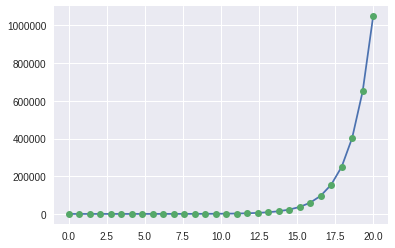

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0, 20, 30)   # start, end, num
y = np.logspace(0, 20, 30, base=2)

plt.plot(x, y, '-')
plt.plot(x, y, 'o')

# ar.reshape()

In [12]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
ar = np.arange(1, 10).reshape((3,3))
ar

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

# 데이터 타입
* ndarray을 생성하면서 데이터 타입을 지정할 수 있다.
* 주로 np.int (np.int64), np.float (np.float64) 사용

In [14]:
ar = np.array([10, 20, 30, 40])
ar.dtype #dtype('int64')

dtype('int64')

In [15]:
ar = np.array([10, 20, 30., 40.]) #30., 40. float
ar.dtype #dtype('float64')

dtype('float64')

In [16]:
ar = np.array([10, 20, 30., 40.], dtype='int')
ar.dtype #dtype('float64')

dtype('int64')

# 데이터 타입 바꾸기
ndarray.astype()로 타입을 변경할 수 있다
* 데이터가 새로 복사 된다.
* str 과 float, int 사이에 변환도 가능

In [17]:
ar = np.array([10, 20, 30, 40])
print(ar.dtype, ar)

af = np.ndarray.astype(ar, np.float)
print(af.dtype, af)

astr = np.ndarray.astype(af, np.str)
print(astr.dtype, astr)

int64 [10 20 30 40]
float64 [10. 20. 30. 40.]
<U32 ['10.0' '20.0' '30.0' '40.0']


# 행(row), 열(column) 추가

In [0]:
import numpy as np

values = [
    [10, 20, 30], 
    [60, 70, 80], 
    [90, 91, 92]
]

ar = np.array(values)

In [19]:
v = [[0, 1, 2]]

np.append(ar, v, axis=0)

array([[10, 20, 30],
       [60, 70, 80],
       [90, 91, 92],
       [ 0,  1,  2]])

In [20]:
v = [[0], [1], [2]] # column vector

np.append(ar, v, axis=1)

array([[10, 20, 30,  0],
       [60, 70, 80,  1],
       [90, 91, 92,  2]])

# 입출력 - savetxt, loadtxt 

numpy.savetxt, numpy.loadtxt
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html

In [0]:
import numpy as np

In [22]:
ar = np.arange(1, 10) # 1..9
ar = ar.reshape((3,3))
ar

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [0]:
np.savetxt("a.data", ar)

In [24]:
# 윈도우에서는 cat 대신 type 명령사용
! cat a.data

1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00
4.000000000000000000e+00 5.000000000000000000e+00 6.000000000000000000e+00
7.000000000000000000e+00 8.000000000000000000e+00 9.000000000000000000e+00


In [0]:
# np.savetxt

# fmt: 형식을 지정 (주로 소수점 이하 자리수를 지정하는 용도로 사용)
# delimiter로 주로 컴마(,)를 사용 (CSV 형식)

np.savetxt("a.csv", ar, fmt='%.2f', delimiter=',', header='sample data', footer='', comments='# ')

In [29]:
! cat a.data

# sample data
1.00,2.00,3.00
4.00,5.00,6.00
7.00,8.00,9.00


In [30]:
# np.loadtxt()
# delimiter로 주로 컴마(,)를 사용 (CSV 형식)

ar = np.loadtxt("a.csv", delimiter=',')
ar

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

# 리뷰
* ndarray - numpy의 핵심
* 생성: np.array(), np.asarray(), np.arange(), np.linspace(), np.logspace()
* ar.reshape()
* 데이터 타입과 ar.astype()
* 입출력 - savetxt, loadtxt 

----
### 2018-2019 [FinanceData.KR](http://fb.com/financedata)